In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats



In [2]:
# Load the dataset
df = pd.read_csv("../data/sierraleone-bumbuna.csv")

In [3]:
# check the first few rows of the dataset
print("First few rows of the dataset:")
df.head()

First few rows of the dataset:


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [4]:
# Summary Statistics & Missing-Value Report
print("Summary Statistics & Missing-Value Report:")
print()
# Overview of numeric columns
print("The description of the numeric columns:")
df.describe()

Summary Statistics & Missing-Value Report:

The description of the numeric columns:


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN


In [5]:
# Check for missing values
print("Check for missing values:")
df.isna().sum()

Check for missing values:


Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [6]:
# checking the columns containing missing values rate greater than 5%
print("Checking the columns containing missing values rate greater than 5%:")
threshold = 0.05
missing_percent = df.isna().mean()
high_missing = missing_percent[missing_percent > threshold]
high_missing

Checking the columns containing missing values rate greater than 5%:


Comments    1.0
dtype: float64

In [7]:
# Outlier Detection & Basic Cleaning
print("Outlier Detection & Basic Cleaning:")

# Define the columns to check for outliers
key_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Compute Z-scores and flag outliers (|Z| > 3)
z_scores = np.abs(stats.zscore(df[key_columns]))

# Flag rows with any |Z| > 3
outlier_mask = (z_scores > 3).any(axis=1)

# Show number of outliers
print(f"Number of outlier rows: {outlier_mask.sum()}")


Outlier Detection & Basic Cleaning:
Number of outlier rows: 16292


In [8]:
# drop outliers
print("Dropping outliers...")
df = df[~outlier_mask]

Dropping outliers...


In [9]:
# checking the rows with invalid values (irradiance targeted)
irradiance_cols = ["GHI", "DNI", "DHI", "ModA", "ModB"]

for col in irradiance_cols:
    invalid_count = (df[col] < 0).sum()
    print(f"{col}: {invalid_count} invalid values (< 0)")

# Drop invalid values
for col in irradiance_cols:
    df = df[df[col] >= 0]

GHI: 259381 invalid values (< 0)
DNI: 263914 invalid values (< 0)
DHI: 261357 invalid values (< 0)
ModA: 0 invalid values (< 0)
ModB: 0 invalid values (< 0)


In [10]:
country = "sierraleone"  # change accordingly
output_path = f"../data/{country}_clean.csv"
df.to_csv(output_path, index=False)
print(f"Cleaned data exported to: {output_path}")

Cleaned data exported to: ../data/sierraleone_clean.csv


In [11]:
# Time Series Analysis
print("Time Series Analysis:")

# Convert 'Timestamp' to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%Y-%m-%d %H:%M')

# Set 'Timestamp' as index
df.set_index('Timestamp', inplace=True)

Time Series Analysis:


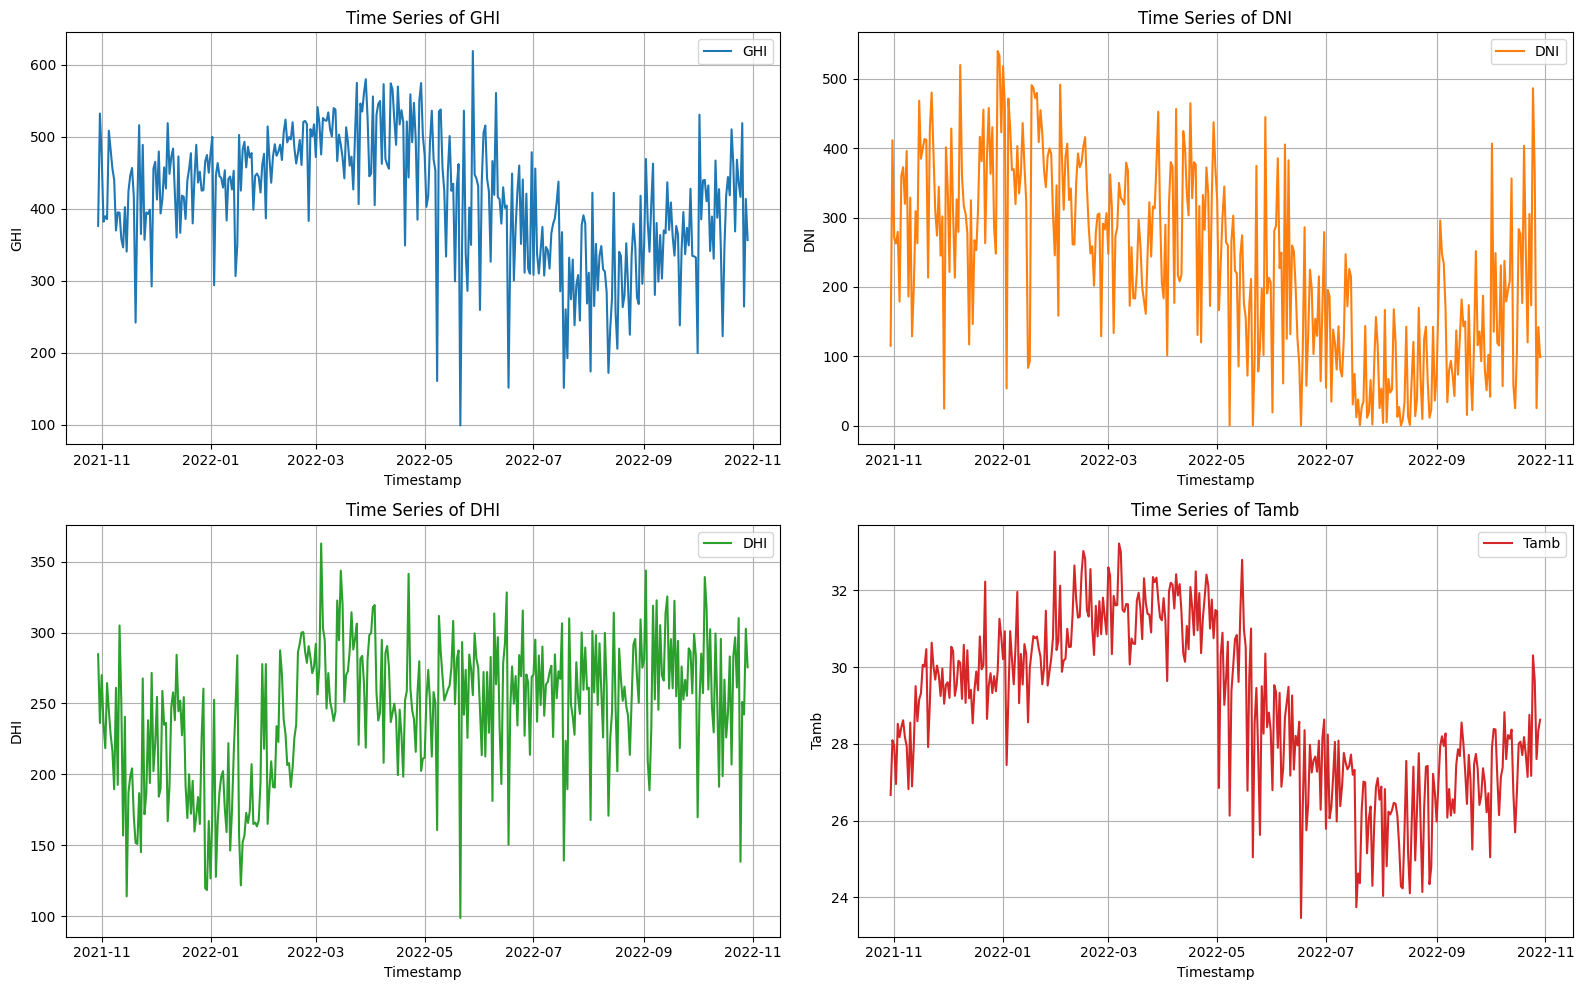

In [12]:

# Define the columns to plot
columns = ['GHI', 'DNI', 'DHI', 'Tamb']

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']

fig, axs = plt.subplots(2, 2, figsize=(16, 10))
axs = axs.flatten()  # Flatten to loop easily

# Plot each column in a separate plot
for i in range(len(columns)):
    col = columns[i]
    axs[i].plot(df.resample('D').mean().ffill().index, df[col].resample('D').mean().ffill(), label=col, color=colors[columns.index(col)])
    axs[i].set_title(f'Time Series of {col}')
    axs[i].set_xlabel('Timestamp')
    axs[i].set_ylabel(col)
    axs[i].grid(True)
    axs[i].legend()

# Adjust layout
plt.tight_layout()
plt.show()


Average ModA and ModB by Cleaning Status:
                ModA        ModB
Cleaning                        
0         424.594145  406.474700
1         279.492480  283.471341


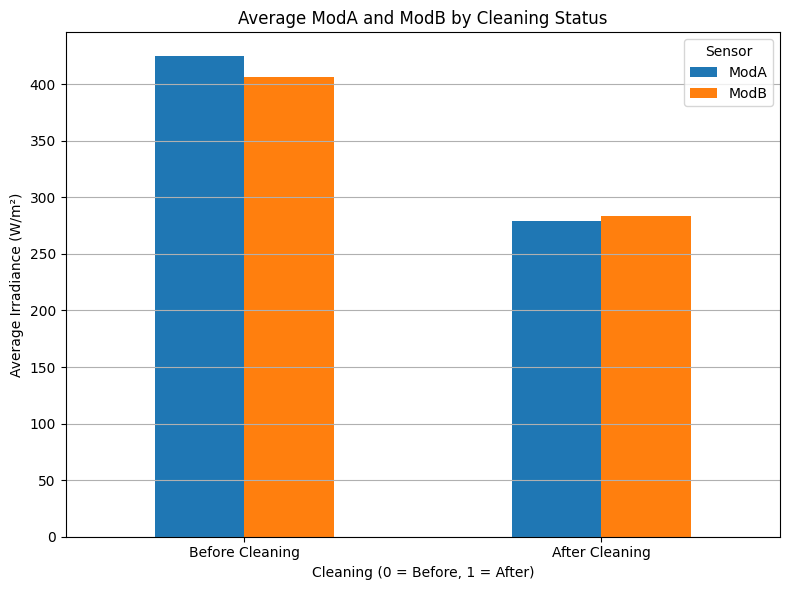

In [13]:
# Group by 'Cleaning' flag and compute mean for ModA and ModB
mod_means = df.groupby('Cleaning')[['ModA', 'ModB']].mean()

# Print the means
print("Average ModA and ModB by Cleaning Status:")
print(mod_means)

# Plot as bar chart
mod_means.plot(kind='bar', figsize=(8, 6), color=['#1f77b4', '#ff7f0e'])
plt.title('Average ModA and ModB by Cleaning Status')
plt.xlabel('Cleaning (0 = Before, 1 = After)')
plt.ylabel('Average Irradiance (W/m²)')
plt.xticks(ticks=[0, 1], labels=['Before Cleaning', 'After Cleaning'], rotation=0)
plt.grid(axis='y')
plt.legend(title='Sensor')
plt.tight_layout()
plt.show()

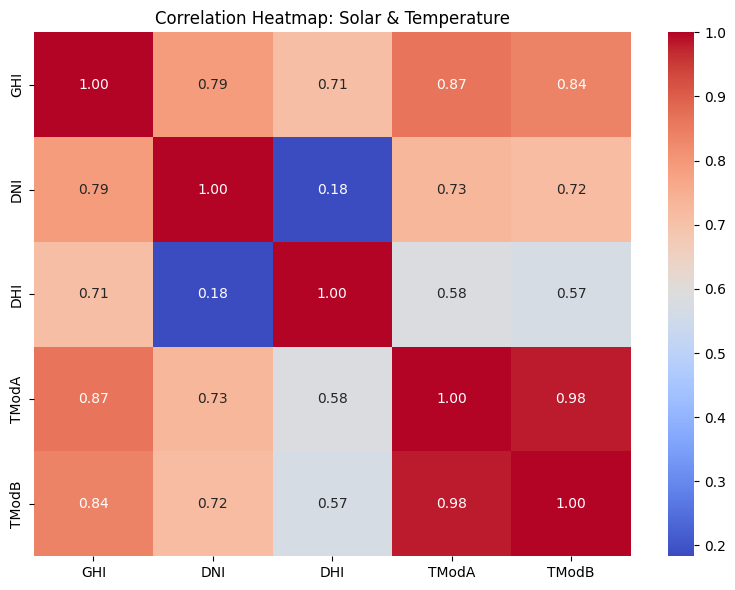

In [14]:
# Select relevant columns
corr_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
corr_matrix = df[corr_cols].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Solar & Temperature')
plt.tight_layout()
plt.show()


Scatter Plots of selected pairs:


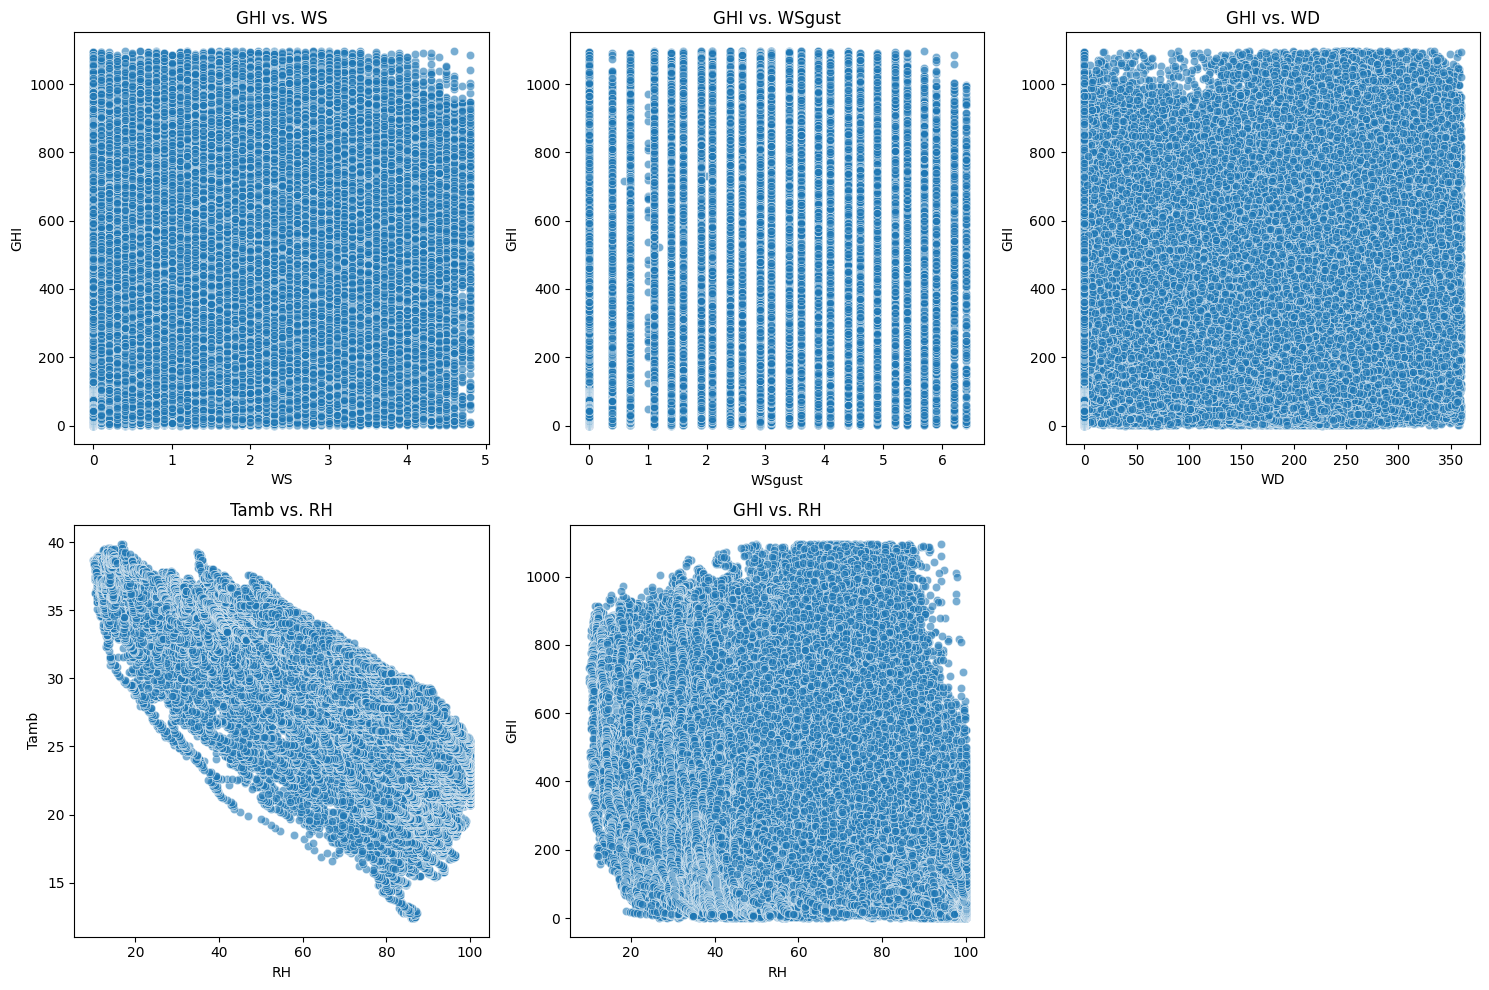

In [15]:
# Scatter Plots of selected pairs
print("Scatter Plots of selected pairs:")
# Define pairs of columns to scatter plot
scatter_pairs = [
    ('WS', 'GHI'),
    ('WSgust', 'GHI'),
    ('WD', 'GHI'),
    ('RH', 'Tamb'),
    ('RH', 'GHI')
]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, (x, y) in enumerate(scatter_pairs):
    sns.scatterplot(data=df, x=x, y=y, ax=axes[i], alpha=0.6)
    axes[i].set_title(f'{y} vs. {x}')
    axes[i].set_xlabel(x)
    axes[i].set_ylabel(y)

# Hide any unused subplot (6th if only 5 plots)
if len(scatter_pairs) < 6:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


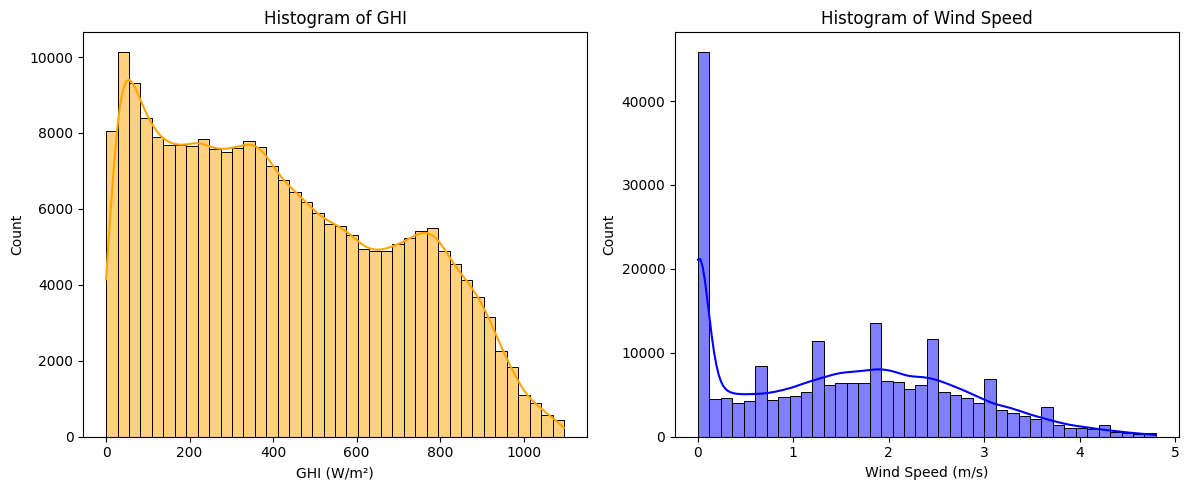

In [16]:
# Histograms of GHI and Wind Speed

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df['GHI'], bins=40, kde=True, ax=axes[0], color='orange')
axes[0].set_title("Histogram of GHI")
axes[0].set_xlabel("GHI (W/m²)")

sns.histplot(df['WS'], bins=40, kde=True, ax=axes[1], color='blue')
axes[1].set_title("Histogram of Wind Speed")
axes[1].set_xlabel("Wind Speed (m/s)")

plt.tight_layout()
plt.show()


Windrose plot for wind speed and direction:


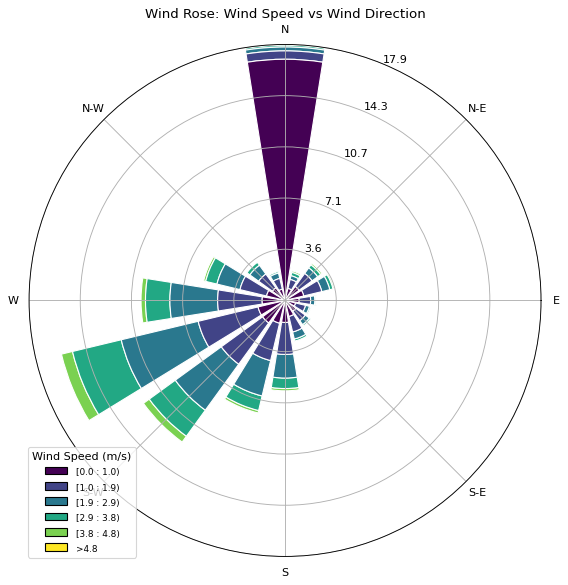

In [17]:
# windrose plot for wind speed and direction
print("Windrose plot for wind speed and direction:")

from windrose import WindroseAxes
# Create Windrose plot
wind_data = df[['WS', 'WD']]
ax = WindroseAxes.from_ax()
ax.bar(wind_data['WD'], wind_data['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend(title="Wind Speed (m/s)")
plt.title("Wind Rose: Wind Speed vs Wind Direction")
plt.show()


Effect of RH on Temperature and GHI:


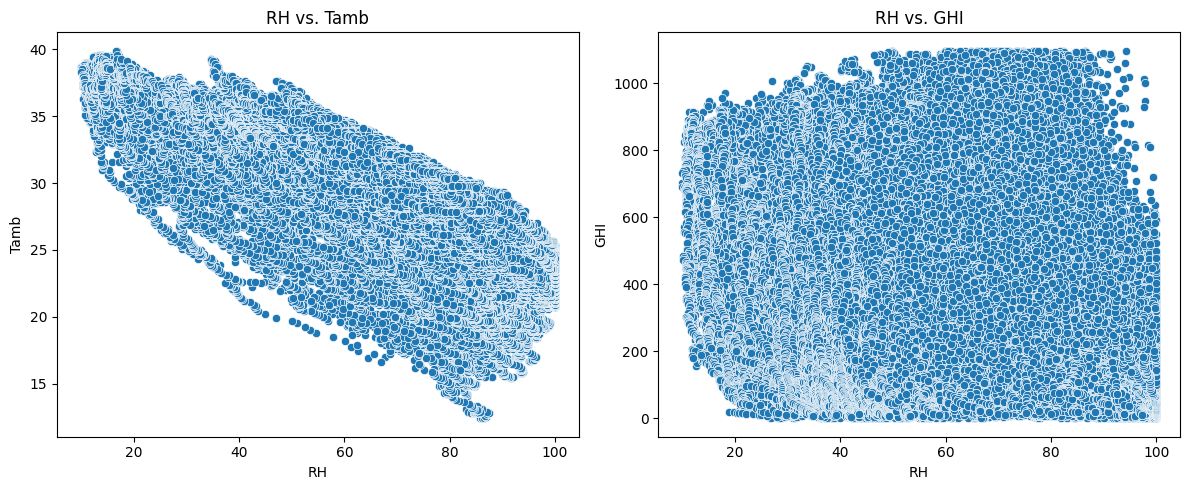

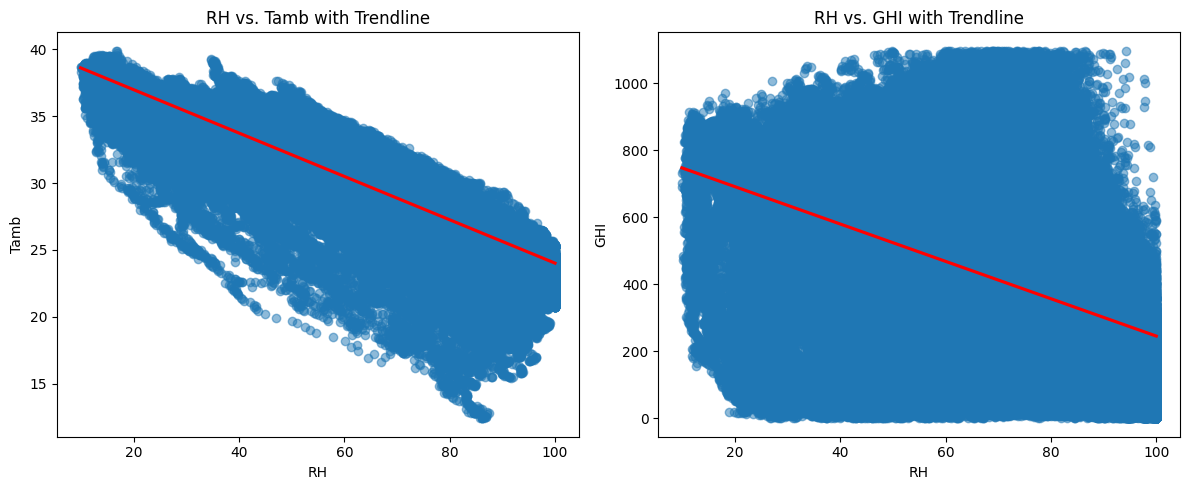

In [18]:
# Effect of RH on Temperature and GHI
print("Effect of RH on Temperature and GHI:")

# Scatter plots of RH vs Tamb and GHI
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.scatterplot(x='RH', y='Tamb', data=df, ax=axs[0])
axs[0].set_title('RH vs. Tamb')

sns.scatterplot(x='RH', y='GHI', data=df, ax=axs[1])
axs[1].set_title('RH vs. GHI')

plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# trendline for RH vs Tamb
sns.regplot(x='RH', y='Tamb', data=df, ax=axs[0], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
axs[0].set_title('RH vs. Tamb with Trendline')
# trendline for RH vs GHI
sns.regplot(x='RH', y='GHI', data=df, ax=axs[1], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
axs[1].set_title('RH vs. GHI with Trendline')
plt.tight_layout()
plt.show()


Bubble chart of GHI vs Tamb with bubble size as RH:


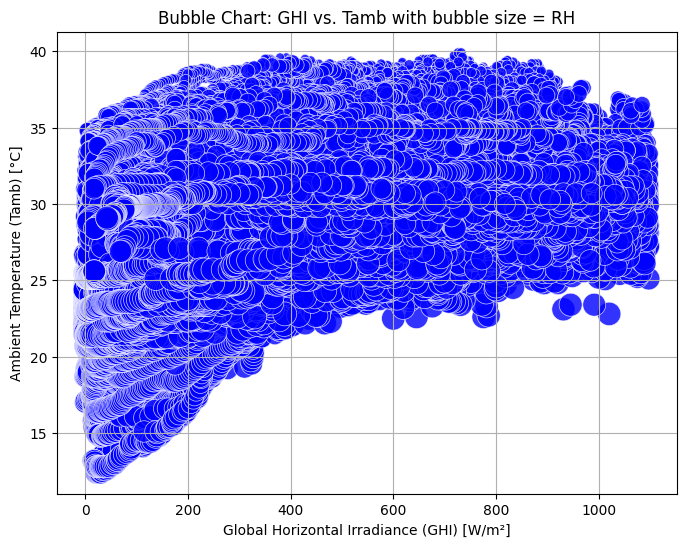

In [19]:
# bubble chart of GHI vs Tamb with bubble size as RH
print("Bubble chart of GHI vs Tamb with bubble size as RH:")
plt.figure(figsize=(8,6))

# Choose bubble size variable: 'RH' or 'BP'
bubble_size = df['RH']  # or df['BP']

# Scale bubble sizes for better visualization
sizes = bubble_size / bubble_size.max() * 300  # adjust multiplier as needed

plt.scatter(df['GHI'], df['Tamb'], s=sizes, alpha=0.8, c='blue', edgecolors='w', linewidth=0.5)

plt.xlabel('Global Horizontal Irradiance (GHI) [W/m²]')
plt.ylabel('Ambient Temperature (Tamb) [°C]')
plt.title('Bubble Chart: GHI vs. Tamb with bubble size = RH')

plt.grid(True)
plt.show()
